
### Problem 1

Consider the following linear least squares problem

\begin{align}
\min \frac{1}{2}((x_1+x_2-3)^2+(2x_1-x_2+4)^2)
\end{align}

We want to write it in the QP form $\frac{1}{2}\mathbf{x}^T\mathbf{Q}\mathbf{x}+\mathbf{q}^T\mathbf{x}$

## Solution Processs
Stack the arguments within the square bracket and put it in standard linear form

\begin{align}
\min \frac{1}{2}\left \Vert \begin{bmatrix}
x_1+x_2-3\\
2x_1-x_2+4
\end{bmatrix}\right\Vert_2^2 = \frac{1}{2}\left \Vert \mathbf{A}\mathbf{x}-\mathbf{b}\right\Vert_2^2
\end{align}

\begin{align}
\mathbf{A} = \begin{bmatrix}
1 & 1\\
2 & -1
\end{bmatrix}, \mathbf{b} = \begin{bmatrix}
3 \\
-4
\end{bmatrix}
\end{align}

We can now define $\mathbf{Q} = \mathbf{A}^T\mathbf{A}, \mathbf{q} = -\mathbf{A}^Tb$

In [12]:
import numpy as np
import jax.numpy as jnp


A_1 = jnp.hstack(( 1, 1  ))
A_2 = jnp.hstack(( 2, -1  ))

A = jnp.vstack((A_1, A_2  ))
b = jnp.hstack((3, -4   ))

Q = jnp.dot(A.T, A)
q = -jnp.dot(A.T, b)

x = jnp.linalg.solve(Q, -q)

print(x)


[-0.3333333  3.3333335]


### Problem 2

Consider the following non-linear least-squares problem

\begin{align}
\min \frac{1}{2}\left\Vert \mathbf{c}(\mathbf{x})\right\Vert_2^2
\end{align}

where

\begin{align}
\left\Vert \mathbf{c}(\mathbf{x})\right\Vert_2^2 = \overbrace{(x_1^2+\sin x_2-3)^2}^{c_1(\mathbf{x})}+\overbrace{(\cos x_1-\sin x_2)^2}^{c_2(\mathbf{x})}
\end{align}

$\mathbf{x} = (x_1, x_2)$


## Solution Process

Construct the folowing vector valued function

\begin{align}
\mathbf{c}(\mathbf{x}) = \begin{bmatrix}
x_1^2+\sin x_2-3\\
\cos x_1-\sin x_2
\end{bmatrix}
\end{align}

Jacobian around some point ${^k}\mathbf{x}$

\begin{align}
\mathbf{A} = \begin{bmatrix}
\nabla_{x}c_1({^k}\mathbf{x})\\
\nabla_{x}c_2({^k}\mathbf{x})
\end{bmatrix}
\end{align}

And linear approximation of $\mathbf{c}(\mathbf{x})$

\begin{align}
\mathbf{c}(\mathbf{x})\approx \mathbf{A}\mathbf{x}-\mathbf{b}
\end{align}

$\mathbf{b} = \mathbf{A}{^k}\mathbf{x}-\mathbf{c}({^k}\mathbf{x})$

LS approximation of NLS is given by

\begin{align}
\frac{1}{2}\left\Vert \mathbf{c}(\mathbf{x})\right\Vert_2^2 \approx \frac{1}{2}\left \Vert \mathbf{A}\mathbf{x}-\mathbf{b}\right\Vert_2^2 = \frac{1}{2}\mathbf{x}^T\mathbf{Q}\mathbf{x}+\mathbf{q}^T\mathbf{x}
\end{align}




[[ 2.          0.5403023 ]
 [-0.84147096 -0.5403023 ]]
[ 1.7951117  -0.22430521]


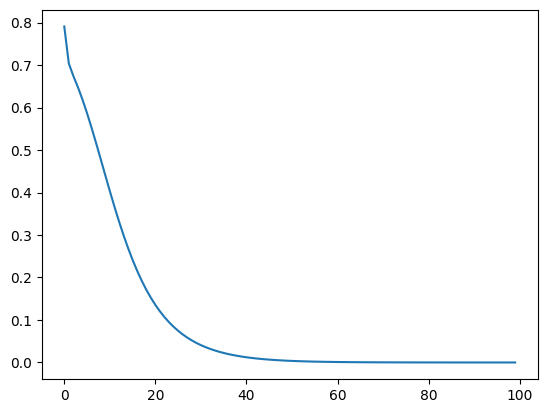

In [19]:
import numpy as np
import jax.numpy as jnp

import matplotlib.pyplot as plt

from jax import jit, random, jacfwd



def compute_error_func(x):

  x_1 = x[0]
  x_2 = x[1]

  error_1 = x_1**2+jnp.sin(x_2)-3
  error_2 = jnp.cos(x_1)-jnp.sin(x_2)

  c = jnp.hstack(( error_1, error_2   ))

  return c

jac_func = jacfwd(compute_error_func, argnums = (0))

x = jnp.ones(2)

print(jac_func(x))


#### Gauss Newton Loop

maxiter = 100

error_track = []
eta = 0.3
for i in range(0, maxiter):
  A = jac_func(x) ### jacobian
  b = jnp.dot(A, x)-compute_error_func(x)

  Q = jnp.dot(A.T, A)+(1/eta)*jnp.identity(2)
  q = -jnp.dot(A.T, b)-(1/eta)*x

  x = jnp.linalg.solve(Q, -q)

  error_value = compute_error_func(x)
  error_track.append(jnp.linalg.norm(error_value))


print(x)

plt.figure(1)
plt.plot(error_track)

plt.show()






### Problem 3

## Solve the NLS problem for IK problem

\begin{align}
\min \frac{1}{2}\left \Vert c(\boldsymbol{\theta})\right \Vert_2^2
\end{align}

\begin{align}
\left \Vert c(\boldsymbol{\theta})\right \Vert_2^2 = (l_1\cos \theta_1+l_2\cos(\theta_1+\theta_2)+l_3 \cos(\theta_1+\theta_2+\theta_3)-x_f)^2+(l_1\sin \theta_1+l_2\sin(\theta_1+\theta_2)+l_3 \sin(\theta_1+\theta_2+\theta_3)-y_f)^2
\end{align}




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp
from jax import jit, random, jacfwd



x_f = 1.0
y_f = 2.0

l_1 = 1.5
l_2 = 1.5
l_3 = 1.5

def compute_error_func(theta):

  pass







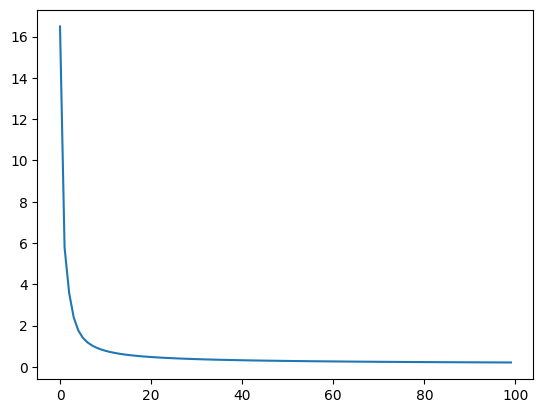

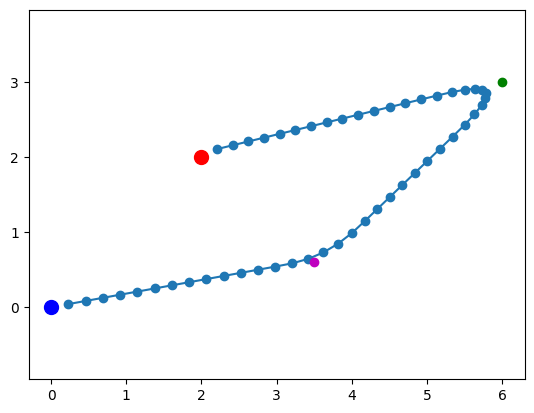

In [24]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit, jacfwd
from functools import partial


def compute_error_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2):
  v_x = v[0: n]
  v_y = v[n:2*n]
  # v_x = v[0: n]
  # omega = v[n: 2*n]

  x = x_init+jnp.cumsum(v_x*delta_t)
  y = y_init+jnp.cumsum(v_y*delta_t)

  # theta_t = theta_0+jnp.cumsum(omega*delta_t)
  # x_t = x_0+jnp.cumsum(v*jnp.cos(theta_t)*delta_t   )
  # y_t = y_0+jnp.cumsum(v*jnp.sin(theta_t)*delta_t   )


  c_g = (x[-1]-x_f)**2+(y[-1]-y_f)**2 ### 1st component
  c_via = (x[m_1]-x_1)**2+(y[m_1]-y_1)**2+(x[m_2]-x_2)**2+(y[m_2]-y_2)**2 ## 2nd component
  c_s = jnp.diff(v_x)**2+jnp.diff(v_y)**2 ## third component

  #c = c_g+c_via+0.01*c_s

  c = jnp.hstack(( c_g, c_via, c_s  ))

  return c

x_init = 0.0
y_init = 0.0
x_f = 2.0
y_f = 2.0

delta_t = 0.2


# v_x = jnp.hstack(( 0.1, 0.2, 0.5  ))
# v_y = jnp.hstack(( 0.2, 0.2, -0.3  ))
# num = jnp.shape(v_x)[0]

# v = jnp.hstack(( v_x, v_y ))

n = 50
v = jnp.zeros(2*n)

jac_func = jacfwd(compute_error_func, argnums = (0))
cost_jit = compute_error_func

eta = 0.2

maxiter = 100

x_1 = 3.5
y_1 = 0.6

x_2 = 6.0
y_2 = 3.0

cost_track = []

m_1 = 15
m_2 = 30



for i in range(0, maxiter):
  A = jac_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2)
  b = jnp.dot(A, v)-compute_error_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2)

  Q = jnp.dot(A.T, A)+(1/eta)*jnp.identity(2*n)
  q = -jnp.dot(A.T, b)-(1/eta)*v

  v = jnp.linalg.solve(Q, -q)

  error = compute_error_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2)
  cost_track.append(jnp.linalg.norm(error))

v_x = v[0: n]
v_y = v[n:2*n]

x = x_init+jnp.cumsum(v_x*delta_t)
y = y_init+jnp.cumsum(v_y*delta_t)


plt.figure(1)
plt.plot(cost_track)

plt.show()

plt.figure(1)
plt.plot(x, y, 'o-')
plt.plot(x_1, y_1, 'om')
plt.plot(x_2, y_2, 'og')
plt.plot(x_f, y_f, 'ok')
plt.plot(x_init, y_init, 'ob', markersize = 10.0 )
plt.plot(x_f, y_f, 'or', markersize = 10.0)


plt.axis('equal')
plt.show()


[ 1.1125379   1.1125929   1.1131294   1.115653    1.130852    1.169717
  1.2106943   1.2430394   1.2604126   1.2590362   1.2372638   1.1954789
  1.1360046   1.0632274   0.98539245  0.9263966   1.0126027   0.9923738
  0.9490851   0.93192863  0.9218072   0.91145986  0.9008249   0.89020604
  0.87413955  0.79853     0.67728263  0.52842927  0.35957247  0.1756039
 -0.01972296 -0.22324902 -0.4183346  -0.60175586 -0.7696337  -0.91682863
 -1.0351493  -1.102828   -1.1103588  -1.1136788  -1.1168259  -1.1197388
 -1.122371   -1.1246915  -1.1267176  -1.1286385  -1.1313     -1.1374182
 -1.1519793  -1.1707308 ]


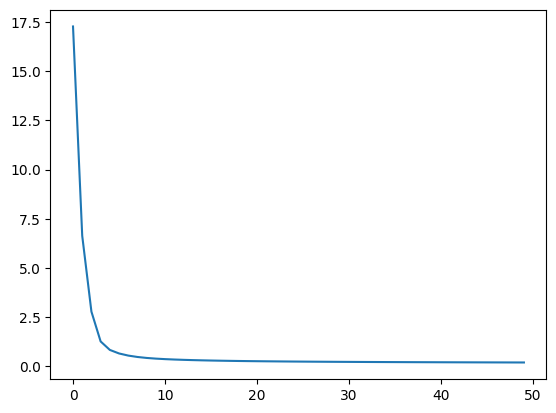

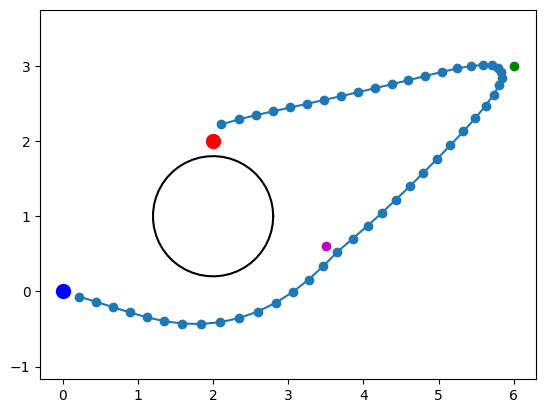

In [30]:

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit, jacfwd
from functools import partial


def compute_error_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2, x_obs, y_obs, r_obs, beta):
  v_x = v[0: n]
  v_y = v[n:2*n]

  x = x_init+jnp.cumsum(v_x*delta_t)
  y = y_init+jnp.cumsum(v_y*delta_t)

  c_g = (x[-1]-x_f)**2+(y[-1]-y_f)**2
  c_via = (x[m_1]-x_1)**2+(y[m_1]-y_1)**2+(x[m_2]-x_2)**2+(y[m_2]-y_2)**2
  c_s = jnp.diff(v_x)**2+jnp.diff(v_y)**2

  f_obs = (x-x_obs)**2+(y-y_obs)**2-r_obs**2
  c_obs = jnp.sum(jnp.log(1+jnp.exp(-beta*f_obs))/beta)
  # c_obs = jnp.maximum(jnp.zeros(n), -f_obs   )

  # c = c_g+c_via+0.03*c_s+c_obs
  c = jnp.hstack((c_g, c_via, c_s, c_obs  ))

  return c

x_init = 0.0
y_init = 0.0
x_f = 2.0
y_f = 2.0

delta_t = 0.2


# v_x = jnp.hstack(( 0.1, 0.2, 0.5  ))
# v_y = jnp.hstack(( 0.2, 0.2, -0.3  ))
# num = jnp.shape(v_x)[0]

# v = jnp.hstack(( v_x, v_y ))

n = 50
v = jnp.zeros(2*n)

jac_func = jacfwd(compute_error_func, argnums = (0))
# cost_jit = compute_cost

eta = 1.0

maxiter = 50

x_1 = 3.5
y_1 = 0.6

x_2 = 6.0
y_2 = 3.0

cost_track = []

m_1 = 15
m_2 = 30

x_obs = 2.0
y_obs = 1.0
r_obs = 0.8
beta = 3.0

for i in range(0, maxiter):

  ##### 1st source of computation cost: finding jacobian
  A = jac_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2, x_obs, y_obs, r_obs, beta)

  b = jnp.dot(A, v)-compute_error_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2, x_obs, y_obs, r_obs, beta)

  Q = jnp.dot(A.T, A)+(1/eta)*jnp.identity(2*n)
  q = -jnp.dot(A.T, b)-(1/eta)*v

  v = jnp.linalg.solve(Q, -q) ##### 2nd source of computation cost

  error = compute_error_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2, x_obs, y_obs, r_obs, beta)
  cost_track.append(jnp.linalg.norm(error))

v_x = v[0: n]
v_y = v[n:2*n]

x = x_init+jnp.cumsum(v_x*delta_t)
y = y_init+jnp.cumsum(v_y*delta_t)

th = jnp.linspace(0, jnp.pi*2, 50)
x_circ = x_obs+r_obs*jnp.cos(th)
y_circ = y_obs+r_obs*jnp.sin(th)


print(v_x)

plt.figure(1)
plt.plot(cost_track)

plt.show()

plt.figure(1)
plt.plot(x, y, 'o-')
plt.plot(x_1, y_1, 'om')
plt.plot(x_2, y_2, 'og')
plt.plot(x_f, y_f, 'ok')
plt.plot(x_circ, y_circ, '-k')
plt.plot(x_init, y_init, 'ob', markersize = 10.0 )
plt.plot(x_f, y_f, 'or', markersize = 10.0)


plt.axis('equal')
plt.show()
